In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from datetime import date

In [80]:
df = pd.read_csv('/content/gdrive/MyDrive/AML python/SAML-D.csv')

In [3]:
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [5]:
df.isnull().sum()

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

In [81]:
df.drop_duplicates()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In


In [7]:
df.nunique()

Time                        86400
Date                          321
Sender_account             292715
Receiver_account           652266
Amount                    2314277
Payment_currency               13
Received_currency              13
Sender_bank_location           18
Receiver_bank_location         18
Payment_type                    7
Is_laundering                   2
Laundering_type                28
dtype: int64

In [82]:
start_date   = "2023-06-01"
df = df[df.Date >= start_date]

In [9]:
df.shape

(2456064, 12)

In [10]:
df['Is_laundering'].value_counts()

Is_laundering
0    2453227
1       2837
Name: count, dtype: int64

In [110]:
columns_to_drop = ['Time']
df = df.drop(columns=columns_to_drop)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.dtypes)

Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency          float64
Received_currency         float64
Sender_bank_location      float64
Receiver_bank_location    float64
Payment_type              float64
Is_laundering               int64
Laundering_type           float64
dtype: object


In [12]:
df.head()

,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
Date,,,,,,,,,,
2023-06-01,1172680616,1904681724,1279.60,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Small_Fan_Out
2023-06-01,1346993016,6109194301,11302.37,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Fan_In
2023-06-01,4094213814,4059926020,11228.93,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Foward
2023-06-01,6353823692,4261858913,20891.16,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Small_Fan_Out
2023-06-01,8463259273,946018491,1265.78,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out


In [111]:
from sklearn.preprocessing import OrdinalEncoder
columns_to_encode = ['Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location' , 'Payment_type', 'Laundering_type']

encoder = OrdinalEncoder()

df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

df.head()

,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
Date,,,,,,,,,,
2023-06-01,1172680616,1904681724,1279.60,10.0,10.0,16.0,16.0,4.0,0,20.0
2023-06-01,1346993016,6109194301,11302.37,10.0,10.0,16.0,16.0,4.0,0,13.0
2023-06-01,4094213814,4059926020,11228.93,10.0,10.0,16.0,16.0,3.0,0,15.0
2023-06-01,6353823692,4261858913,20891.16,10.0,10.0,16.0,16.0,4.0,0,20.0
2023-06-01,8463259273,946018491,1265.78,10.0,10.0,16.0,16.0,6.0,0,20.0


# Exploratory Data Analysis

In [14]:
df['Is_laundering'].value_counts()

Is_laundering
0    2453227
1       2837
Name: count, dtype: int64

<Axes: title={'center': 'Count (Is_laundering)'}, xlabel='Is_laundering'>

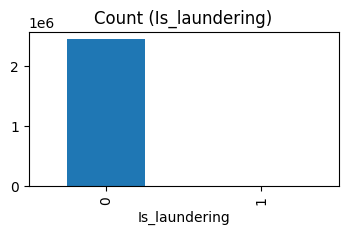

In [93]:
plt.figure(figsize = (4,2))
df.Is_laundering.value_counts().plot(kind='bar', title='Count (Is_laundering)')

<ipython-input-90-b105edb3ae49>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Laundering_type', palette= color,order=df['Laundering_type'].value_counts().index)
<ipython-input-90-b105edb3ae49>:2: UserWarning: 
The palette list has fewer values (10) than needed (28) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y='Laundering_type', palette= color,order=df['Laundering_type'].value_counts().index)


Text(0, 0.5, 'Laundering Type')

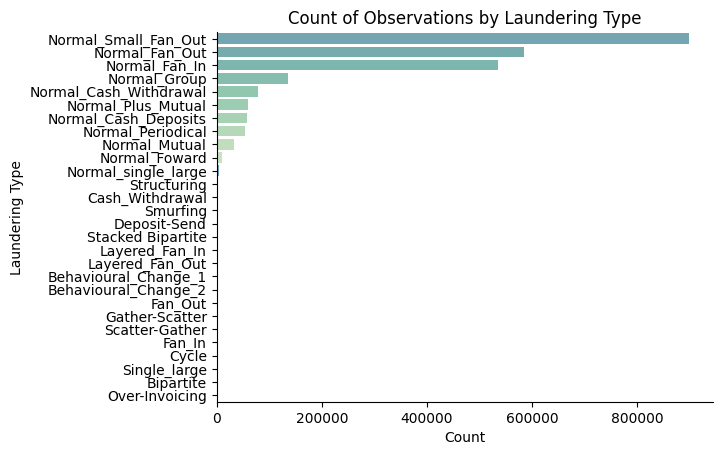

In [90]:
color = sns.cubehelix_palette(10, start=1.3, rot=-0.98, hue = 1, dark = 0.6, reverse = True)
sns.countplot(data=df, y='Laundering_type', palette= color,order=df['Laundering_type'].value_counts().index)
plt.title('Count of Observations by Laundering Type')
sns.despine()
plt.xlabel('Count')
plt.ylabel('Laundering Type')

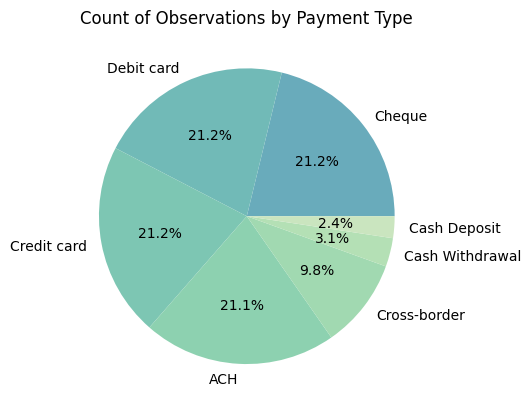

In [106]:
class_distribution = df['Payment_type'].value_counts()
labels = class_distribution.index

color = sns.cubehelix_palette(7, start=1.3, rot=-0.98, hue = 1, dark = 0.6, reverse = True)
plt.pie(class_distribution,labels = labels, autopct='%1.1f%%', colors = color)

plt.title('Count of Observations by Payment Type')

plt.show()

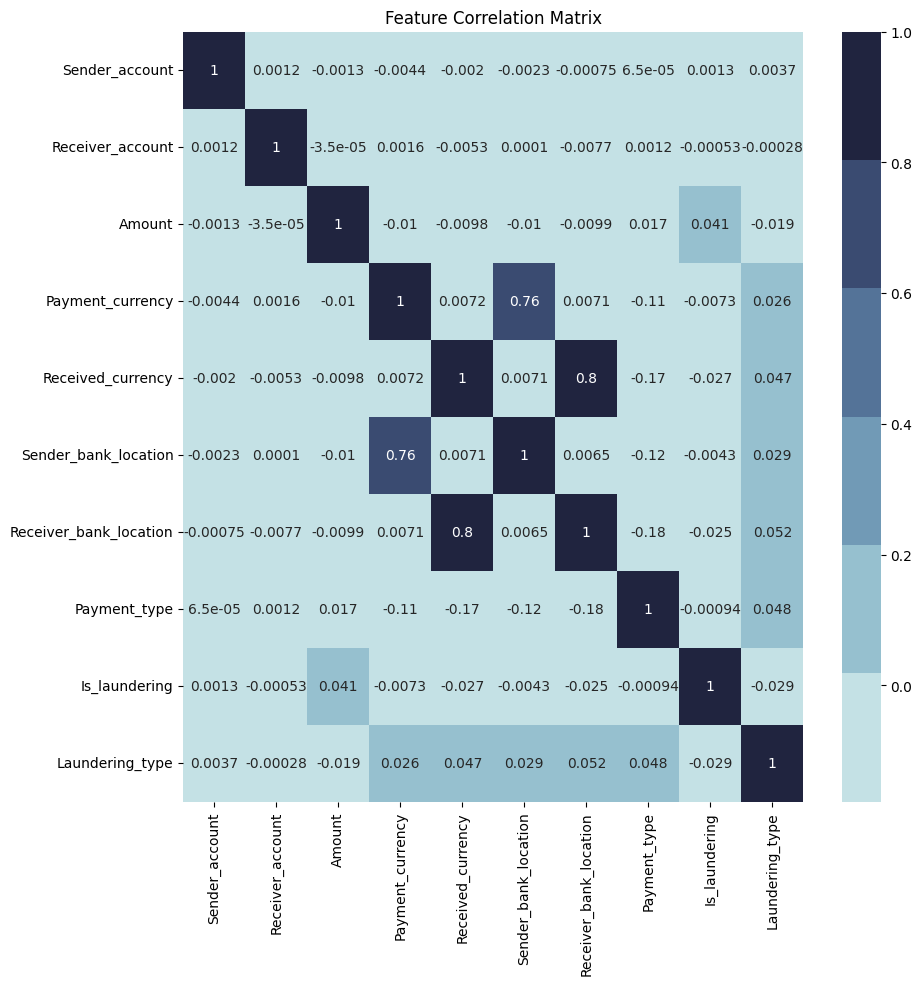

In [68]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 10))
plt.title('Feature Correlation Matrix')
cmap = sns.cubehelix_palette(rot=-.2)
sns.heatmap(correlation_matrix, cmap=cmap, annot=True)

plt.show()

# Train Test Split

In [112]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

## Imbalanced class from the sample, so downsampling is applied here

<Axes: title={'center': 'Count (Is_laundering)'}, xlabel='Is_laundering'>

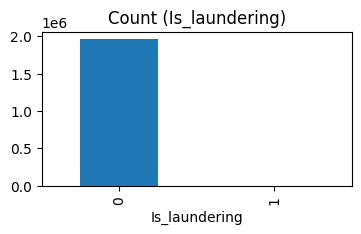

In [113]:
plt.figure(figsize = (4,2))
train.Is_laundering.value_counts().plot(kind='bar', title='Count (Is_laundering)')

In [114]:
df_class_0 = train[train['Is_laundering'] == 0]
df_class_1 = train[train['Is_laundering'] == 1]

Downsampled: 
 Is_laundering
0    2283
1    2283
Name: count, dtype: int64


<Axes: title={'center': 'Count (Is_laundering)'}, xlabel='Is_laundering'>

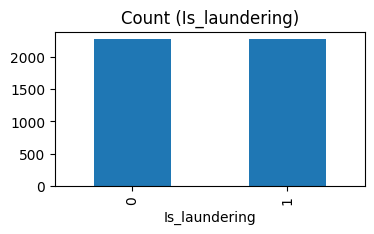

In [115]:
from sklearn.utils import resample
df_class_0_lower = resample(df_class_0,
                                   replace=False,  # sample without replacement
                                   n_samples=len(df_class_1),  # match minority class
                                   random_state=42)

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_class_0_lower, df_class_1])

# Shuffle the DataFrame to mix up the rows
df_downsampled = df_downsampled.sort_values('Date')

# Now df_downsampled is the balanced dataset
print('Downsampled: \n', df_downsampled['Is_laundering'].value_counts())

# Plot the counts
plt.figure(figsize = (4,2))
df_downsampled['Is_laundering'].value_counts().plot(kind='bar', title='Count (Is_laundering)')

In [20]:
df_downsampled.head()

,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
Date,,,,,,,,,,
2023-06-01,7142954696,9378220825,13932.00,10.0,10.0,16.0,16.0,0.0,0,20.0
2023-06-01,1503698870,384080951,5364.88,10.0,10.0,16.0,16.0,3.0,0,20.0
2023-06-01,6223365730,3409832869,394389.70,10.0,10.0,16.0,16.0,3.0,1,24.0
2023-06-01,512735624,3376452222,14118.09,10.0,10.0,16.0,16.0,6.0,0,14.0
2023-06-01,6191804567,3458503586,5545.62,10.0,10.0,16.0,16.0,0.0,1,27.0


In [21]:
X_train = df_downsampled.drop(columns=['Is_laundering'], axis=1)
y_train = df_downsampled['Is_laundering']

In [22]:
X_test = test.drop(columns=['Is_laundering'], axis=1)
y_test = test['Is_laundering']

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Set batch size
batch_size = 5000

# List to store predictions
y_pred_nb = []

# Iterate over test data in batches
for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i+batch_size]
    batch_predictions = model_nb.predict(batch)
    y_pred_nb.extend(batch_predictions)

print("Batch predictions:")
print(y_pred_nb)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy is: ', result_nb*100)

Accuracy is:  91.84773204292232


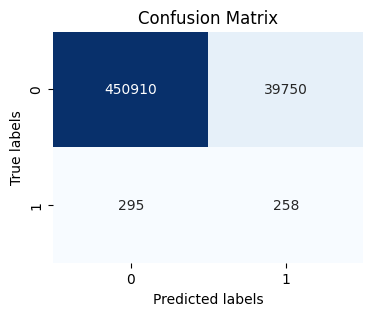

In [40]:
# Compute the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [41]:
# True Positives (TP), False Positives (FP), False Negatives (FN)
TP = cm_nb[1, 1]
FP = cm_nb[0, 1]
FN = cm_nb[1, 0]

#precision = TP / (TP + FP)
recall = TP / (TP + FN)

#f1_score = 2 * (precision * recall) / (precision + recall)

#print("Precision:", precision)
print("Recall:", recall)
#print("F1-Score:", f1_score)


Recall: 0.4665461121157324


Since the cost of not detecting true money laundering cases (false negatives) is high, Recall (also known as Sensitivity or True Positive Rate) is the most important metric for evaluation.

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Set batch size
batch_size = 5000

# List to store predictions
y_pred_lr = []

# Iterate over test data in batches
for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i+batch_size]
    batch_predictions = model_lr.predict(batch)
    y_pred_lr.extend(batch_predictions)

print("Batch predictions:")
print(y_pred_lr)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy is: ', result_lr*100)

Accuracy is:  79.0017772330944


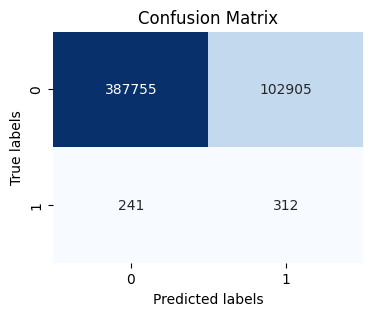

In [56]:
# Compute the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [57]:
# True Positives (TP), False Positives (FP), False Negatives (FN)
TP = cm_lr[1, 1]
FP = cm_lr[0, 1]
FN = cm_lr[1, 0]

#precision = TP / (TP + FP)
recall = TP / (TP + FN)

#f1_score = 2 * (precision * recall) / (precision + recall)

#print("Precision:", precision)
print("Recall:", recall)
#print("F1-Score:", f1_score)

Recall: 0.5641952983725136


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
X_test.shape

(491213, 9)

In [ ]:
# Set batch size
batch_size = 5000

# List to store predictions
y_pred_knn = []

# Iterate over test data in batches
for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i+batch_size]
    batch_predictions = model_knn.predict(batch)
    y_pred_knn.extend(batch_predictions)

print("Batch predictions:")
print(y_pred_knn)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy is: ', result_knn*100)

Accuracy is:  97.26737688131219


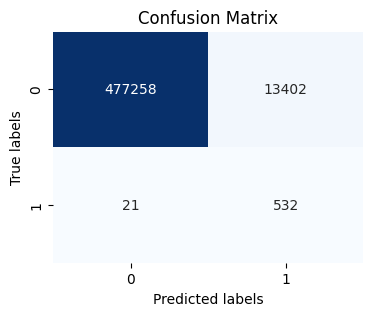

In [29]:
# Compute the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [36]:
# True Positives (TP), False Positives (FP), False Negatives (FN)
TP = cm_knn[1, 1]
FP = cm_knn[0, 1]
FN = cm_knn[1, 0]

#precision = TP / (TP + FP)
recall = TP / (TP + FN)

#f1_score = 2 * (precision * recall) / (precision + recall)

#print("Precision:", precision)
print("Recall:", recall)
#print("F1-Score:", f1_score)


Recall: 0.9620253164556962


# SVC

In [46]:
from sklearn.svm import SVC

model_sv = SVC()
model_sv.fit(X_train, y_train)

SVC()

In [ ]:
# Set batch size
batch_size = 5000

# List to store predictions
y_pred_sv = []

# Iterate over test data in batches
for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i+batch_size]
    batch_predictions = model_sv.predict(batch)
    y_pred_sv.extend(batch_predictions)

print("Batch predictions:")
print(y_pred_sv)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result_sv = accuracy_score(y_test, y_pred_sv)
print('Accuracy is: ', result_sv*100)

Accuracy is:  98.25004631392085


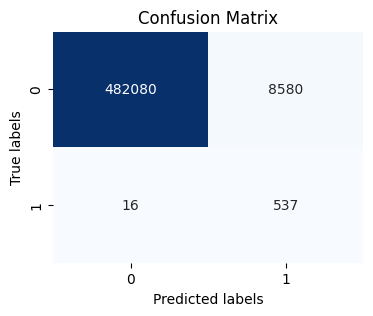

In [49]:
# Compute the confusion matrix
cm_sv = confusion_matrix(y_test, y_pred_sv)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm_sv, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [51]:
# True Positives (TP), False Positives (FP), False Negatives (FN)
TP = cm_sv[1, 1]
FP = cm_sv[0, 1]
FN = cm_sv[1, 0]

#precision = TP / (TP + FP)
recall = TP / (TP + FN)

#f1_score = 2 * (precision * recall) / (precision + recall)

#print("Precision:", precision)
print("Recall:", recall)
#print("F1-Score:", f1_score)

Recall: 0.9710669077757685
